In [1]:
# ================================================================
# H₂ Symmetry Function Visualization Script (G2 + G4)
# ================================================================
# This script visualizes the radial (G2) and angular (G4) symmetry
# functions designed for modeling high-temperature, high-pressure H₂.
#
# === How to Use ===
# - Run this script using Python (requires matplotlib + numpy)
# - The plot will be saved as "symfunc_visual_H2.png"
#
# === Key Design Principles for H₂ ===
# 1. Short-range G2:
#    - μ ∈ [0.5, 0.9] Å with large η (e.g., η = 50.0) for tight near-bond resolution
# 2. Long-range G2:
#    - μ ∈ [1.0, 4.0] Å with small η (e.g., η = 0.8889) to capture broader context
# 3. Center-mode G2:
#    - Multiple η values centered at μ = 0 to complement shift-mode descriptors
#    - Useful for improving force resolution under isotropic pressure
# 4. G4 (Type 3, narrow angular):
#    - Low ζ ∈ [1, 2, 4] with λ = ±1
#    - Covers key bond angles in simple systems like H₂
# 5. G4 (Type 9, wide angular):
#    - Wider ζ ∈ [8, 12, 16], η ∈ [0.5, 1.0, 2.0]
#    - λ = ±1 only (avoid λ = 0 to suppress flat response)
#    - Avoid too large ζ (e.g., >24) to prevent divergence during training
#
# === Notes ===
# - Use cutoff radius r_cut = 5.0 Å for low-density H₂
# - For high-pressure environments, consider increasing r_cut and extending μ range
# - You may safely reduce the number of symmetry functions for light models
#

In [1]:
import numpy as np

def generate_rich_symfuncs(element='H', r_cutoff=5.0):
    results = []

    def block_comment(title):
        return [
            "#" * 73,
            f"# {title} for elements ['{element}']",
            "#" * 73
        ]

    # === Short-range G2 (Shift-mode) ===
    n_short = 100
    eta_short = 50.0
    r_lower_s, r_upper_s = 0.5, 1.5
    mu_grid_short = np.linspace(r_lower_s, r_upper_s, n_short)
    results.extend(block_comment("Short-range radial symmetry function set (shift mode)"))
    for mu in mu_grid_short:
        results.append(f"symfunction_short {element}  2 {element}  {eta_short:.3E} {mu:.3E} {r_cutoff:.3E}")

    # === Long-range G2 (Shift-mode) ===
    n_long = 100
    eta_long = 0.8889
    r_lower_l, r_upper_l = 1.5, 4.0
    mu_grid_long = np.linspace(r_lower_l, r_upper_l, n_long)
    results.append("")
    results.extend(block_comment("Long-range radial symmetry function set (shift mode)"))
    for mu in mu_grid_long:
        results.append(f"symfunction_short {element}  2 {element}  {eta_long:.3E} {mu:.3E} {r_cutoff:.3E}")

    # === Center-mode G2 ===
    eta_centre_set = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 16.0, 20.0, 32.0]
    results.append("")
    results.extend(block_comment("Center-mode radial symmetry function set"))
    for eta in eta_centre_set:
        results.append(f"symfunction_short {element}  2 {element}  {eta:.3E} 0.000E+00 {r_cutoff:.3E} centre")

    # === Narrow Angular G4 (Type 3) ===
    n_angular = 100
    eta_ang = 2.0
    lambdas = [-1, 1]
    zetas_narrow = [1, 2, 4]
    r_grid_ang = np.linspace(1.0, 4.0, n_angular)
    results.append("")
    results.extend(block_comment("Narrow angular symmetry function set (Type 3)"))
    for r in r_grid_ang:
        for lam in lambdas:
            for zeta in zetas_narrow:
                results.append(f"symfunction_short {element}  3 {element}  {element}  {eta_ang:.3E} {lam:+d} {zeta:.1f} {r_cutoff:.3E} {r:.3E}")

    # === Wide Angular G4 (Type 9) ===
    zetas_wide = [8, 12, 16]
    eta_wide_set = [0.5, 1.0]
    r_wide_grid = np.linspace(1.0, 4.5, 80)
    results.append("")
    results.extend(block_comment("Wide angular symmetry function set (Type 9)"))
    for r in r_wide_grid:
        for lam in lambdas:
            for zeta in zetas_wide:
                for eta in eta_wide_set:
                    results.append(f"symfunction_short {element}  9 {element}  {element}  {eta:.3E} {lam:+d} {zeta:.1f} {r_cutoff:.3E} {r:.3E}")

    # === Summary Dictionary ===
    summary = {
        "n_short": n_short,
        "eta_short": eta_short,
        "mu_grid_short": mu_grid_short,
        "n_long": n_long,
        "eta_long": eta_long,
        "mu_grid_long": mu_grid_long,
        "eta_center_set": eta_centre_set,
        "n_ang": n_angular,
        "zetas_narrow": zetas_narrow,
        "zetas_wide": zetas_wide,
        "eta_wide_set": eta_wide_set,
        "lambdas": lambdas,
        "r_grid": r_grid_ang,
        "r_wide_grid": r_wide_grid
    }

    return "\n".join(results), summary

# === Run and Save ===
if __name__ == "__main__":
    text, summary = generate_rich_symfuncs()

    with open("generated_symfuncs.txt", "w") as f:
        f.write(text)
    print("[✓] Saved to generated_symfuncs.txt")

    print("\n=== Symmetry Function Parameter Summary ===")
    print("G2 (radial, shift mode):")
    print(f"  - Short-range: {summary['n_short']} functions (η={summary['eta_short']}, μ ∈ [{summary['mu_grid_short'][0]:.2f}, {summary['mu_grid_short'][-1]:.2f}])")
    print(f"  - Long-range : {summary['n_long']} functions (η={summary['eta_long']}, μ ∈ [{summary['mu_grid_long'][0]:.2f}, {summary['mu_grid_long'][-1]:.2f}])")

    print("G2 (radial, center mode):")
    print(f"  - Centered   : {len(summary['eta_center_set'])} functions (η values = {summary['eta_center_set']})")

    print("G4 (angular, Type 3 - narrow):")
    total_narrow = summary['n_ang'] * len(summary['lambdas']) * len(summary['zetas_narrow'])
    print(f"  - {total_narrow} functions total")
    print(f"  - ζ values: {summary['zetas_narrow']}, λ values: {summary['lambdas']}, r ∈ [{summary['r_grid'][0]:.2f}, {summary['r_grid'][-1]:.2f}]")

    print("G4 (angular, Type 9 - wide):")
    total_wide = len(summary['r_wide_grid']) * len(summary['lambdas']) * len(summary['zetas_wide']) * len(summary['eta_wide_set'])
    print(f"  - {total_wide} functions total")
    print(f"  - ζ values: {summary['zetas_wide']}, η values: {summary['eta_wide_set']}, λ values: {summary['lambdas']}, r ∈ [{summary['r_wide_grid'][0]:.2f}, {summary['r_wide_grid'][-1]:.2f}]")


[✓] Saved to generated_symfuncs.txt

=== Symmetry Function Parameter Summary ===
G2 (radial, shift mode):
  - Short-range: 100 functions (η=50.0, μ ∈ [0.50, 1.50])
  - Long-range : 100 functions (η=0.8889, μ ∈ [1.50, 4.00])
G2 (radial, center mode):
  - Centered   : 9 functions (η values = [1.0, 2.0, 4.0, 6.0, 8.0, 10.0, 16.0, 20.0, 32.0])
G4 (angular, Type 3 - narrow):
  - 600 functions total
  - ζ values: [1, 2, 4], λ values: [-1, 1], r ∈ [1.00, 4.00]
G4 (angular, Type 9 - wide):
  - 960 functions total
  - ζ values: [8, 12, 16], η values: [0.5, 1.0], λ values: [-1, 1], r ∈ [1.00, 4.50]


[✓] Plot saved to: symfunc_visual_overview_v5.png


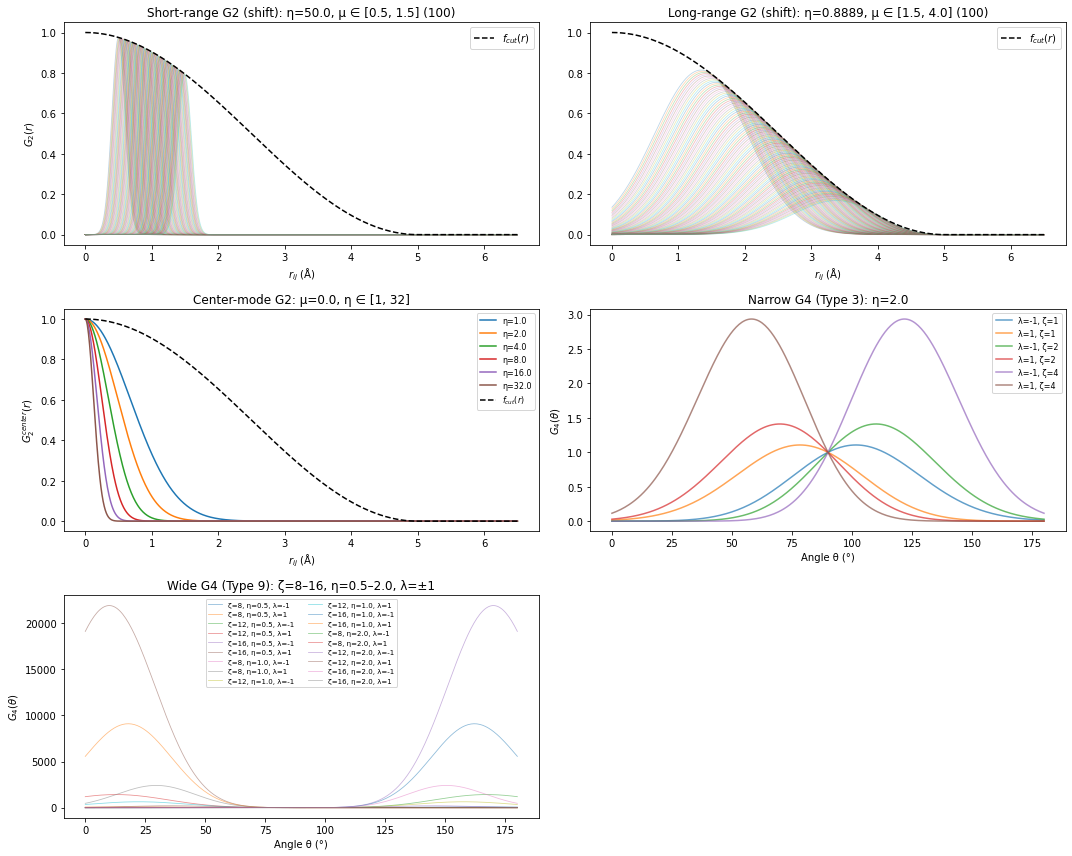

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cutoff_function(r, r_cut):
    return np.where(r <= r_cut, 0.5 * (np.cos(np.pi * r / r_cut) + 1), 0.0)

def gaussian(r, eta, mu, r_cut):
    return np.exp(-eta * (r - mu)**2) * cutoff_function(r, r_cut)

def angular_response(theta, eta, lam, zeta):
    return (1 + lam * np.cos(theta))**zeta * np.exp(-eta * (theta - np.pi / 2)**2)

def plot_updated_symfuncs(output="symfunc_visual_overview_v5.png"):
    r = np.linspace(0, 6.5, 800)
    theta = np.linspace(0, np.pi, 300)
    r_cut = 5.0
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))

    # === G2 parameters ===
    eta_short, mu_short = 50.0, np.linspace(0.5, 1.5, 100)
    eta_long, mu_long = 0.8889, np.linspace(1.5, 4.0, 100)
    eta_center_list = [1.0, 2.0, 4.0, 8.0, 16.0, 32.0]

    # === G4 parameters ===
    zeta_narrow = [1, 2, 4]
    zeta_wide = [8, 12, 16]
    eta_wide_set = [0.5, 1.0, 2.0]
    lam_list = [-1,1]

    # === Short-range G2 ===
    ax = axes[0, 0]
    for mu in mu_short:
        ax.plot(r, gaussian(r, eta_short, mu, r_cut), alpha=0.3, linewidth=0.8)
    ax.plot(r, cutoff_function(r, r_cut), 'k--', label="$f_{cut}(r)$")
    ax.set_title("Short-range G2 (shift): η=50.0, μ ∈ [0.5, 1.5] (100)")
    ax.set_xlabel("$r_{ij}$ (Å)")
    ax.set_ylabel("$G_2(r)$")
    ax.legend()

    # === Long-range G2 ===
    ax = axes[0, 1]
    for mu in mu_long:
        ax.plot(r, gaussian(r, eta_long, mu, r_cut), alpha=0.3, linewidth=0.8)
    ax.plot(r, cutoff_function(r, r_cut), 'k--', label="$f_{cut}(r)$")
    ax.set_title("Long-range G2 (shift): η=0.8889, μ ∈ [1.5, 4.0] (100)")
    ax.set_xlabel("$r_{ij}$ (Å)")
    ax.legend()

    # === Center-mode G2 ===
    ax = axes[1, 0]
    mu_centre = 0.0
    for eta in eta_center_list:
        ax.plot(r, gaussian(r, eta, mu_centre, r_cut), label=f"η={eta:.1f}")
    ax.plot(r, cutoff_function(r, r_cut), 'k--', label="$f_{cut}(r)$")
    ax.set_title("Center-mode G2: μ=0.0, η ∈ [1, 32]")
    ax.set_xlabel("$r_{ij}$ (Å)")
    ax.set_ylabel("$G_2^{center}(r)$")
    ax.legend(fontsize=8)

    # === G4 narrow (type 3) ===
    ax = axes[1, 1]
    for zeta in zeta_narrow:
        for lam in lam_list:
            ax.plot(np.degrees(theta),
                    angular_response(theta, eta=2.0, lam=lam, zeta=zeta),
                    label=f"λ={lam}, ζ={zeta}", alpha=0.7)
    ax.set_title("Narrow G4 (Type 3): η=2.0")
    ax.set_xlabel("Angle θ (°)")
    ax.set_ylabel("$G_4(θ)$")
    ax.legend(fontsize=8)

    # === G4 wide (type 9) ===
    ax = axes[2, 0]
    for eta in eta_wide_set:
        for zeta in zeta_wide:
            for lam in lam_list:
                ax.plot(np.degrees(theta),
                        angular_response(theta, eta=eta, lam=lam, zeta=zeta),
                        label=f"ζ={zeta}, η={eta}, λ={lam}",
                        alpha=0.5, linewidth=0.8)
    ax.set_title("Wide G4 (Type 9): ζ=8–16, η=0.5–2.0, λ=±1")
    ax.set_xlabel("Angle θ (°)")
    ax.set_ylabel("$G_4(θ)$")
    ax.legend(fontsize=7, ncol=2)

    # === Empty subplot ===
    axes[2, 1].axis('off')

    plt.tight_layout()
    plt.savefig(output, dpi=300)
    print(f"[✓] Plot saved to: {output}")

# === Run ===
plot_updated_symfuncs()
